# Text Preprocessing for NLP ✨

**Learning Objectives:**
- Understand why text preprocessing is essential for NLP tasks
- Master core preprocessing techniques: tokenization, normalization, stemming, and lemmatization
- Learn to remove noise and handle special cases in text data
- Build a complete preprocessing pipeline for real-world text
- Compare different preprocessing strategies and their trade-offs

**Contents:**
1. Setup and Prerequisites
2. Understanding Text Preprocessing (Theory)
3. Tokenization: Breaking Text into Pieces
4. Text Normalization and Cleaning
5. Stemming vs Lemmatization
6. Building a Complete Pipeline
7. Practical Examples and Use Cases

## 1. Setup and Prerequisites

First, install required packages:
```bash
pip install nltk spacy pandas matplotlib
python -m spacy download en_core_web_sm
```

We'll use:
- **NLTK**: Traditional NLP toolkit with extensive preprocessing tools
- **spaCy**: Modern, fast NLP library with excellent lemmatization
- **re**: Python's built-in regular expressions for pattern matching

In [ ]:
import re
import string
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# NLTK imports
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# spaCy import
import spacy

# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('punkt_tab', quiet=True)

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

print("✓ All libraries loaded successfully!")
print(f"NLTK version: {nltk.__version__}")
print(f"spaCy version: {spacy.__version__}")

✓ All libraries loaded successfully!
NLTK version: 3.9.1
spaCy version: 3.8.7


## 2. Understanding Text Preprocessing

### Why Preprocess Text?

Raw text is messy and inconsistent. Preprocessing transforms text into a clean, standardized format that machine learning models can understand effectively.

### Key Challenges in Raw Text:

1. **Variation**: "running", "runs", "ran" are different forms of the same concept
2. **Noise**: HTML tags, URLs, special characters, extra whitespace
3. **Case sensitivity**: "Apple" (company) vs "apple" (fruit)
4. **Stop words**: Common words like "the", "is", "at" that carry little meaning
5. **Punctuation**: May or may not be relevant depending on the task

### Common Preprocessing Steps:

```
Raw Text
   ↓
Lowercasing
   ↓
Tokenization (splitting into words/sentences)
   ↓
Remove noise (HTML, URLs, special chars)
   ↓
Remove stopwords
   ↓
Stemming/Lemmatization (normalize word forms)
   ↓
Clean, standardized tokens
```

### Important Note:

Not all steps are always necessary! The right preprocessing depends on your task:
- **Sentiment analysis**: Keep punctuation ("great!" vs "great.")
- **Topic modeling**: Remove stopwords aggressively
- **Named Entity Recognition**: Preserve capitalization
- **Machine translation**: Minimal preprocessing

## 3. Tokenization: Breaking Text into Pieces

**Tokenization** splits text into smaller units (tokens). This is typically the first step in any NLP pipeline.

### Types of Tokenization:

1. **Word tokenization**: Split into words
2. **Sentence tokenization**: Split into sentences
3. **Subword tokenization**: Split into meaningful subunits (used in modern transformers)

### Challenges:

- Contractions: "don't" → ["do", "n't"] or ["don't"]?
- Hyphenated words: "state-of-the-art"
- URLs and emails
- Punctuation: Keep or remove?

In [5]:
# Sample text for demonstration
sample_text = """
Natural Language Processing (NLP) is amazing! It's revolutionizing how we interact
with computers. Visit https://nlp-tutorial.com for more info. Dr. Smith's research
shows that state-of-the-art models achieve 95.5% accuracy. Don't you think that's incredible?
"""

print("=" * 70)
print("ORIGINAL TEXT")
print("=" * 70)
print(sample_text)
print()

# 1. Basic word tokenization with NLTK
print("=" * 70)
print("1. NLTK WORD TOKENIZATION")
print("=" * 70)
tokens_nltk = word_tokenize(sample_text)
print(f"Number of tokens: {len(tokens_nltk)}")
print(f"First 15 tokens: {tokens_nltk[:15]}")
print()

# 2. Sentence tokenization
print("=" * 70)
print("2. SENTENCE TOKENIZATION")
print("=" * 70)
sentences = sent_tokenize(sample_text)
print(f"Number of sentences: {len(sentences)}")
for i, sent in enumerate(sentences, 1):
    print(f"Sentence {i}: {sent.strip()}")
print()

# 3. Simple whitespace tokenization
print("=" * 70)
print("3. SIMPLE WHITESPACE TOKENIZATION")
print("=" * 70)
tokens_simple = sample_text.split()
print(f"Number of tokens: {len(tokens_simple)}")
print(f"First 10 tokens: {tokens_simple[:10]}")
print("Note: Punctuation is attached to words!")
print()

# 4. Regexp tokenization (alphanumeric only)
print("=" * 70)
print("4. REGEXP TOKENIZATION (alphanumeric only)")
print("=" * 70)
tokenizer = RegexpTokenizer(r'\w+')
tokens_regexp = tokenizer.tokenize(sample_text)
print(f"Number of tokens: {len(tokens_regexp)}")
print(f"First 15 tokens: {tokens_regexp[:15]}")
print("Note: All punctuation removed!")
print()

# 5. spaCy tokenization
print("=" * 70)
print("5. SPACY TOKENIZATION")
print("=" * 70)
doc = nlp(sample_text)
tokens_spacy = [token.text for token in doc]
print(f"Number of tokens: {len(tokens_spacy)}")
print(f"First 15 tokens: {tokens_spacy[:15]}")
print()

ORIGINAL TEXT

Natural Language Processing (NLP) is amazing! It's revolutionizing how we interact 
with computers. Visit https://nlp-tutorial.com for more info. Dr. Smith's research 
shows that state-of-the-art models achieve 95.5% accuracy. Don't you think that's incredible?


1. NLTK WORD TOKENIZATION
Number of tokens: 47
First 15 tokens: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'amazing', '!', 'It', "'s", 'revolutionizing', 'how', 'we', 'interact']

2. SENTENCE TOKENIZATION
Number of sentences: 5
Sentence 1: Natural Language Processing (NLP) is amazing!
Sentence 2: It's revolutionizing how we interact 
with computers.
Sentence 3: Visit https://nlp-tutorial.com for more info.
Sentence 4: Dr. Smith's research 
shows that state-of-the-art models achieve 95.5% accuracy.
Sentence 5: Don't you think that's incredible?

3. SIMPLE WHITESPACE TOKENIZATION
Number of tokens: 33
First 10 tokens: ['Natural', 'Language', 'Processing', '(NLP)', 'is', 'amazing!', "It's", 'revolu

## 4. Text Normalization and Cleaning

**Normalization** standardizes text to reduce variability. This includes:

### Common Normalization Techniques:

1. **Lowercasing**: Convert all text to lowercase
2. **Remove punctuation**: Strip special characters
3. **Remove numbers**: Unless they're meaningful for your task
4. **Remove extra whitespace**: Normalize spacing
5. **Remove URLs and emails**: Clean web-scraped data
6. **Remove HTML tags**: For web content
7. **Handle contractions**: Expand "don't" → "do not"
8. **Remove stopwords**: Filter common words

In [6]:
# Sample text with various noise
noisy_text = """
   Hey!!! Check out this AMAZING deal at www.example.com 😊
   Email us at info@example.com for 50% OFF!!!
   <p>This HTML tag should be removed.</p>
   Call 555-1234 or text #NLP2024... It's the BEST!!!
"""

print("ORIGINAL TEXT:")
print(repr(noisy_text))
print("\n" + "=" * 70 + "\n")

# Step 1: Lowercase
text = noisy_text.lower()
print("1. After lowercasing:")
print(text)
print()

# Step 2: Remove URLs
text = re.sub(r'http\S+|www\S+', '', text)
print("2. After removing URLs:")
print(text)
print()

# Step 3: Remove email addresses
text = re.sub(r'\S+@\S+', '', text)
print("3. After removing emails:")
print(text)
print()

# Step 4: Remove HTML tags
text = re.sub(r'<.*?>', '', text)
print("4. After removing HTML:")
print(text)
print()

# Step 5: Remove numbers
text = re.sub(r'\d+', '', text)
print("5. After removing numbers:")
print(text)
print()

# Step 6: Remove punctuation
text = text.translate(str.maketrans('', '', string.punctuation))
print("6. After removing punctuation:")
print(text)
print()

# Step 7: Remove extra whitespace
text = ' '.join(text.split())
print("7. After normalizing whitespace:")
print(text)
print()

# Step 8: Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
tokens = text.split()
filtered_tokens = [word for word in tokens if word not in stop_words]
print("8. After removing stopwords:")
print(filtered_tokens)
print()

print("=" * 70)
print(f"Original tokens: {len(noisy_text.split())}")
print(f"Final tokens: {len(filtered_tokens)}")
print(f"Reduction: {(1 - len(filtered_tokens)/len(noisy_text.split()))*100:.1f}%")

ORIGINAL TEXT:
"\n   Hey!!! Check out this AMAZING deal at www.example.com 😊\n   Email us at info@example.com for 50% OFF!!!\n   <p>This HTML tag should be removed.</p>\n   Call 555-1234 or text #NLP2024... It's the BEST!!!   \n"


1. After lowercasing:

   hey!!! check out this amazing deal at www.example.com 😊
   email us at info@example.com for 50% off!!!
   <p>this html tag should be removed.</p>
   call 555-1234 or text #nlp2024... it's the best!!!   


2. After removing URLs:

   hey!!! check out this amazing deal at  😊
   email us at info@example.com for 50% off!!!
   <p>this html tag should be removed.</p>
   call 555-1234 or text #nlp2024... it's the best!!!   


3. After removing emails:

   hey!!! check out this amazing deal at  😊
   email us at  for 50% off!!!
   <p>this html tag should be removed.</p>
   call 555-1234 or text #nlp2024... it's the best!!!   


4. After removing HTML:

   hey!!! check out this amazing deal at  😊
   email us at  for 50% off!!!
   this html ta

### Visualizing Stopwords Impact

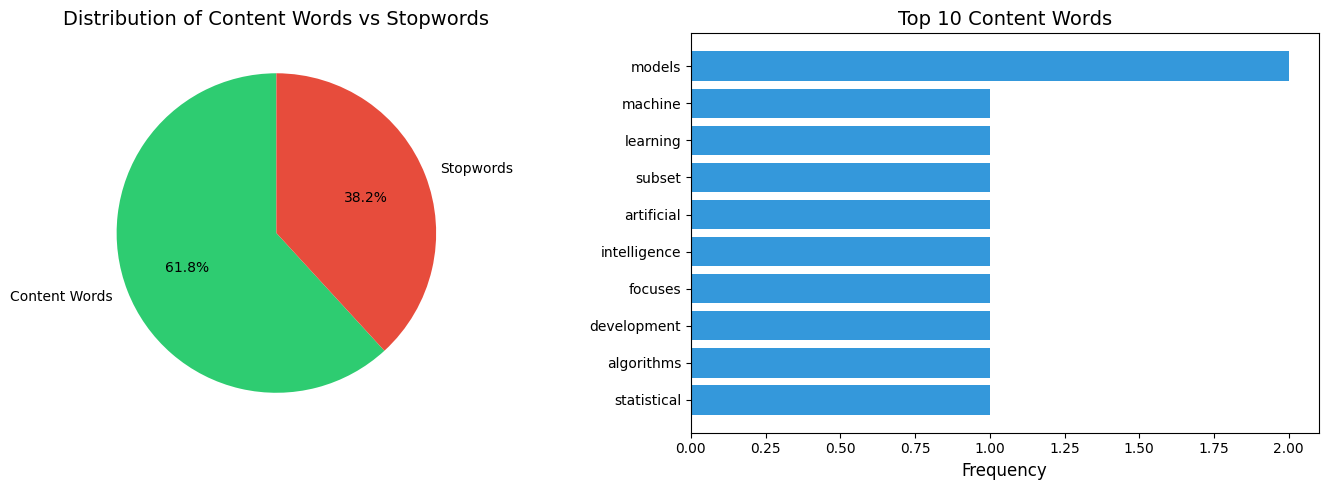

Total tokens: 55
Stopwords: 21 (38.2%)
Content words: 34 (61.8%)


In [7]:
# Sample longer text
longer_text = """
Machine learning is a subset of artificial intelligence that focuses on
the development of algorithms and statistical models. These models enable
computers to improve their performance on a specific task through experience,
without being explicitly programmed. The field has seen tremendous growth
in recent years, with applications ranging from image recognition to
natural language processing.
"""

# Tokenize
tokens = word_tokenize(longer_text.lower())
tokens = [t for t in tokens if t.isalnum()]

# Get stopwords
stop_words = set(stopwords.words('english'))

# Separate into stopwords and content words
stopwords_found = [t for t in tokens if t in stop_words]
content_words = [t for t in tokens if t not in stop_words]

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
sizes = [len(content_words), len(stopwords_found)]
labels = ['Content Words', 'Stopwords']
colors = ['#2ecc71', '#e74c3c']
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribution of Content Words vs Stopwords', fontsize=14)

# Word frequency
content_freq = Counter(content_words).most_common(10)
words, counts = zip(*content_freq)
ax2.barh(words, counts, color='#3498db')
ax2.set_xlabel('Frequency', fontsize=12)
ax2.set_title('Top 10 Content Words', fontsize=14)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

print(f"Total tokens: {len(tokens)}")
print(f"Stopwords: {len(stopwords_found)} ({len(stopwords_found)/len(tokens)*100:.1f}%)")
print(f"Content words: {len(content_words)} ({len(content_words)/len(tokens)*100:.1f}%)")

## 5. Stemming vs Lemmatization

Both techniques reduce words to their base form, but they work differently:

### Stemming

**Definition**: Removes suffixes using rules (e.g., "running" → "run", "better" → "better")

**Pros:**
- Fast and simple
- No dictionary required
- Works on any word

**Cons:**
- Often produces non-words ("studies" → "studi")
- Can be too aggressive or too lenient
- Language-specific rules

**Popular algorithms:**
- Porter Stemmer (most common)
- Snowball Stemmer (improved Porter)
- Lancaster Stemmer (most aggressive)

### Lemmatization

**Definition**: Uses dictionary and morphological analysis to find the actual root word

**Pros:**
- Always produces valid words
- More accurate and context-aware
- Better for human-readable output

**Cons:**
- Slower (requires dictionary lookup)
- Needs POS (part-of-speech) tags for best results
- Limited to words in dictionary

### When to Use Which?

- **Stemming**: Search engines, information retrieval, when speed matters
- **Lemmatization**: Text analytics, sentiment analysis, when accuracy matters

In [12]:
# Initialize stemmer and lemmatizer
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Test words covering different cases
test_words = [
    'running', 'ran', 'runs', 'runner',
    'better', 'best', 'good',
    'studies', 'studying', 'studied',
    'caring', 'cares', 'carefully',
    'feet', 'geese', 'mice',
    'organization', 'organizing', 'organized'
]

print("=" * 90)
print(f"{'Word':<15} {'Porter':<15} {'Lemmatizer':<15} {'Lemma (verb)':<15}")
print("=" * 90)

for word in test_words:
    stem_porter = porter.stem(word)
    lemma_noun = lemmatizer.lemmatize(word)  # Default: noun
    lemma_verb = lemmatizer.lemmatize(word, pos='v')  # As verb

    print(f"{word:<15} {stem_porter:<15} {lemma_noun:<15} {lemma_verb:<15}")

print("\n" + "=" * 90)
print("Key Observations:")
print("1. Stemming can produce non-words (e.g., 'studi', 'care')")
print("2. Lemmatization preserves valid words but needs POS tags for accuracy")
print("3. Irregular forms (feet→foot, geese→goose) only work with lemmatization")
print("4. Context matters: 'better' as adjective → 'good', but needs POS tagging")

Word            Porter          Lemmatizer      Lemma (verb)   
running         run             running         run            
ran             ran             ran             run            
runs            run             run             run            
runner          runner          runner          runner         
better          better          better          better         
best            best            best            best           
good            good            good            good           
studies         studi           study           study          
studying        studi           studying        study          
studied         studi           studied         study          
caring          care            caring          care           
cares           care            care            care           
carefully       care            carefully       carefully      
feet            feet            foot            feet           
geese           gees            goose   

### Advanced Lemmatization with spaCy

spaCy automatically determines POS tags and applies appropriate lemmatization:

In [13]:
# Sample sentences showing context-dependent lemmatization
sentences = [
    "The runners were running faster than expected.",
    "She runs a successful organization.",
    "The meeting ran longer than scheduled.",
    "Better algorithms produce better results."
]

print("=" * 80)
print("SPACY LEMMATIZATION (Context-Aware)")
print("=" * 80)

for sent in sentences:
    doc = nlp(sent)
    print(f"\nOriginal: {sent}")
    print(f"{'Token':<15} {'Lemma':<15} {'POS':<10} {'Tag':<10}")
    print("-" * 50)

    for token in doc:
        if not token.is_punct and not token.is_space:
            print(f"{token.text:<15} {token.lemma_:<15} {token.pos_:<10} {token.tag_:<10}")

SPACY LEMMATIZATION (Context-Aware)

Original: The runners were running faster than expected.
Token           Lemma           POS        Tag       
--------------------------------------------------
The             the             DET        DT        
runners         runner          NOUN       NNS       
were            be              AUX        VBD       
running         run             VERB       VBG       
faster          fast            ADV        RBR       
than            than            SCONJ      IN        
expected        expect          VERB       VBN       

Original: She runs a successful organization.
Token           Lemma           POS        Tag       
--------------------------------------------------
She             she             PRON       PRP       
runs            run             VERB       VBZ       
a               a               DET        DT        
successful      successful      ADJ        JJ        
organization    organization    NOUN       NN        



## 6. Building a Complete Preprocessing Pipeline

Let's combine everything into a reusable preprocessing class with configurable options:

In [18]:
class TextPreprocessor:
    """
    Configurable text preprocessing pipeline.

    Parameters:
    -----------
    lowercase : bool, default=True
        Convert text to lowercase
    remove_urls : bool, default=True
        Remove URLs and email addresses
    remove_html : bool, default=True
        Remove HTML tags
    remove_punctuation : bool, default=True
        Remove punctuation marks
    remove_numbers : bool, default=False
        Remove numeric characters
    remove_stopwords : bool, default=True
        Remove common stopwords
    method : str, default='lemma'
        Normalization method: 'lemma', 'stem', or None
    min_token_length : int, default=2
        Minimum token length to keep
    """

    def __init__(self, lowercase=True, remove_urls=True, remove_html=True,
                 remove_punctuation=True, remove_numbers=False,
                 remove_stopwords=True, method='lemma', min_token_length=2):

        self.lowercase = lowercase
        self.remove_urls = remove_urls
        self.remove_html = remove_html
        self.remove_punctuation = remove_punctuation
        self.remove_numbers = remove_numbers
        self.remove_stopwords = remove_stopwords
        self.method = method
        self.min_token_length = min_token_length

        # Initialize tools
        self.stop_words = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()
        self.lemmatizer = WordNetLemmatizer()
        self.nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

    def clean(self, text):
        """Apply cleaning operations"""
        if self.lowercase:
            text = text.lower()

        if self.remove_urls:
            text = re.sub(r'http\S+|www\S+|\S+@\S+', '', text)

        if self.remove_html:
            text = re.sub(r'<.*?>', '', text)

        if self.remove_numbers:
            text = re.sub(r'\d+', '', text)

        return text

    def tokenize(self, text):
        """Tokenize text"""
        if self.remove_punctuation:
            tokenizer = RegexpTokenizer(r'\w+')
            return tokenizer.tokenize(text)
        else:
            # Use NLTK's word_tokenize to preserve punctuation during initial tokenization
            return word_tokenize(text)

    def normalize(self, tokens):
        """Apply stemming or lemmatization"""
        if self.method == 'stem':
            return [self.stemmer.stem(token) for token in tokens]
        elif self.method == 'lemma':
            # Use spaCy for context-aware lemmatization
            text = ' '.join(tokens)
            doc = self.nlp(text)
            # When remove_punctuation is False, include punctuation tokens in the output
            return [token.lemma_ if not token.is_punct else token.text for token in doc if not token.is_space]
        else:
            return tokens

    def filter_tokens(self, tokens):
        """Filter tokens by length and stopwords"""
        # Filter by length, ensuring punctuation is not filtered by length unless it's a single character and min_token_length > 1
        if self.min_token_length > 1 and not self.remove_punctuation:
             tokens = [t for t in tokens if len(t) >= self.min_token_length or t in string.punctuation]
        else:
            tokens = [t for t in tokens if len(t) >= self.min_token_length]


        # Remove stopwords
        if self.remove_stopwords:
            # Check against lowercased token, as stopwords are lowercase
            tokens = [t for t in tokens if t.lower() not in self.stop_words or t in string.punctuation] # Don't remove punctuation if it's a stopword (unlikely but safe)

        return tokens

    def preprocess(self, text, return_string=False):
        """
        Complete preprocessing pipeline.

        Parameters:
        -----------
        text : str
            Input text to preprocess
        return_string : bool, default=False
            If True, return a space-joined string.
            If False, return a list of tokens.
        """
        # 1. Clean
        cleaned_text = self.clean(text)

        # 2. Tokenize
        tokens = self.tokenize(cleaned_text)

        # 3. Normalize
        # This step handles 'lemma', 'stem', or None
        normalized_tokens = self.normalize(tokens)

        # 4. Filter
        filtered_tokens = self.filter_tokens(normalized_tokens)

        # 5. Return
        if return_string:
            return ' '.join(filtered_tokens)
        else:
            return filtered_tokens

In [19]:
# Test the pipeline
preprocessor = TextPreprocessor(
    lowercase=True,
    remove_urls=True,
    remove_html=True,
    remove_punctuation=True,
    remove_numbers=True,
    remove_stopwords=True,
    method='lemma',
    min_token_length=3
)

test_text = """
<p>This is a <b>test</b> sentence! Check http://example.com.
It's for NLP 2025. The runners are running.</p>
"""

print("Original Text:\n", test_text)
processed_tokens = preprocessor.preprocess(test_text)
print("\nProcessed Tokens:\n", processed_tokens)

processed_string = preprocessor.preprocess(test_text, return_string=True)
print("\nProcessed String:\n", processed_string)

Original Text:
 
<p>This is a <b>test</b> sentence! Check http://example.com. 
It's for NLP 2025. The runners are running.</p>


Processed Tokens:
 ['test', 'sentence', 'check', 'nlp', 'runner', 'run']

Processed String:
 test sentence check nlp runner run


## 7. Practical Examples and Use Cases

Let's apply our preprocessing pipeline to real-world scenarios.

### Example 1: Sentiment Analysis Preprocessing

For sentiment analysis, we want to preserve some context while removing noise:

In [20]:
# Sample reviews
reviews = [
    "This product is AMAZING!!! Best purchase ever! 😊",
    "Terrible quality... Don't waste your money. Very disappointing.",
    "It's okay, nothing special. Works as expected.",
    "Absolutely love it! Would definitely recommend to everyone!!!"
]

print("=" * 70)
print("SENTIMENT ANALYSIS PREPROCESSING")
print("=" * 70)
print("\nStrategy: Keep punctuation intensity, remove URLs/noise\n")

# For sentiment, we keep punctuation but clean noise
sentiment_preprocessor = TextPreprocessor(
    lowercase=True,
    remove_urls=True,
    remove_punctuation=False,  # Keep for sentiment!
    remove_stopwords=False,    # Stopwords can carry sentiment (e.g., 'not')
    method='lemma',
    min_token_length=2
)

for i, review in enumerate(reviews, 1):
    tokens = sentiment_preprocessor.preprocess(review)
    processed = ' '.join(tokens)

    print(f"Review {i}:")
    print(f"  Original:  {review}")
    print(f"  Processed: {processed}")
    print()

SENTIMENT ANALYSIS PREPROCESSING

Strategy: Keep punctuation intensity, remove URLs/noise

Review 1:
  Original:  This product is AMAZING!!! Best purchase ever! 😊
  Processed: this product be amazing ! ! ! good purchase ever !

Review 2:
  Original:  Terrible quality... Don't waste your money. Very disappointing.
  Processed: terrible quality ... do not waste your money . very disappointing .

Review 3:
  Original:  It's okay, nothing special. Works as expected.
  Processed: it be okay , nothing special . work as expect .

Review 4:
  Original:  Absolutely love it! Would definitely recommend to everyone!!!
  Processed: absolutely love it ! would definitely recommend to everyone ! ! !



### Example 2: Topic Modeling Preprocessing

For topic modeling (e.g., LDA), we want to be very aggressive to find the core "topics" (clusters of words). This means removing all noise, including stopwords and punctuation, and reducing words to their core lemma.

In [21]:
# Sample documents
docs = [
    "Machine learning and artificial intelligence are growing fields.",
    "Deep learning, a subset of machine learning, uses neural networks.",
    "Natural language processing allows computers to understand text.",
    "Understanding and processing language is a key goal of AI."
]

print("=" * 70)
print("TOPIC MODELING PREPROCESSING")
print("=" * 70)
print("\nStrategy: Aggressive cleaning, remove stopwords, lemmatize\n")

# For topic modeling, we are aggressive
topic_preprocessor = TextPreprocessor(
    lowercase=True,
    remove_urls=True,
    remove_punctuation=True,
    remove_numbers=True,
    remove_stopwords=True,
    method='lemma',
    min_token_length=3  # Remove short, non-topical words
)

for i, doc in enumerate(docs, 1):
    tokens = topic_preprocessor.preprocess(doc)
    processed = ' '.join(tokens)

    print(f"Doc {i}:")
    print(f"  Original:  {doc}")
    print(f"  Processed: {processed}")
    print()

TOPIC MODELING PREPROCESSING

Strategy: Aggressive cleaning, remove stopwords, lemmatize

Doc 1:
  Original:  Machine learning and artificial intelligence are growing fields.
  Processed: machine learning artificial intelligence grow field

Doc 2:
  Original:  Deep learning, a subset of machine learning, uses neural networks.
  Processed: deep learn subset machine learning use neural network

Doc 3:
  Original:  Natural language processing allows computers to understand text.
  Processed: natural language processing allow computer understand text

Doc 4:
  Original:  Understanding and processing language is a key goal of AI.
  Processed: understanding processing language key goal



## 8. Conclusion and Key Takeaways

Text preprocessing is a critical and foundational step in any NLP project. It's not a one-size-fits-all process.

**Key Takeaways:**
* **Purpose:** Transform messy, raw text into a clean, structured format for models.
* **Core Steps:** Tokenization, Normalization (lowercasing, cleaning noise), and Word-Form Reduction (Stemming/Lemmatization).
* **Stemming vs. Lemmatization:**
    * **Stemming** (e.g., Porter) is fast, rule-based, and can create non-words (`studi`). Good for speed (e.g., search indexing).
    * **Lemmatization** (e.g., WordNet, spaCy) is slower, dictionary-based, and produces valid words (`study`). Good for accuracy (e.g., sentiment analysis, topic modeling).
* **Task-Dependent:** The most important rule!
    * **Sentiment Analysis:** You might *keep* punctuation (`!`) and stopwords (`not`).
    * **Topic Modeling:** You should be *aggressive* in removing stopwords, punctuation, and numbers.
    * **NER:** You must *keep* capitalization.